In [ ]:
Boston Housing Analysis

Project - Boston Analysis

Project Prepared by - Shivani shambharkar

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
# load boston housing dataset from openml
boston = fetch_openml(name='boston', version=1, as_frame=True)

In [ ]:
data = boston.frame
data.rename(columns={'MEDV': 'PRICE'}, inplace=True)
print(data.head())


      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  PRICE  
0  396.90   4.98   24.0  
1  396.90   9.14   21.6  
2  392.83   4.03   34.7  
3  394.63   2.94   33.4  
4  396.90   5.33   36.2  


In [ ]:
boston.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
boston.data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [ ]:
boston.target

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [ ]:
boston.feature_names

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [ ]:
print(boston.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

# Convert the data into Pandas dataframe

In [ ]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [ ]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88


In [ ]:
df.shape

(506, 13)

# check the data types

In [ ]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000
PTRATIO,506.0,18.455534,2.164946,12.60000,17.400000,19.05000,20.200000,22.0000
B,506.0,356.674032,91.294864,0.32000,375.377500,391.44000,396.225000,396.9000


# correlation between variables and target2

<Axes: >

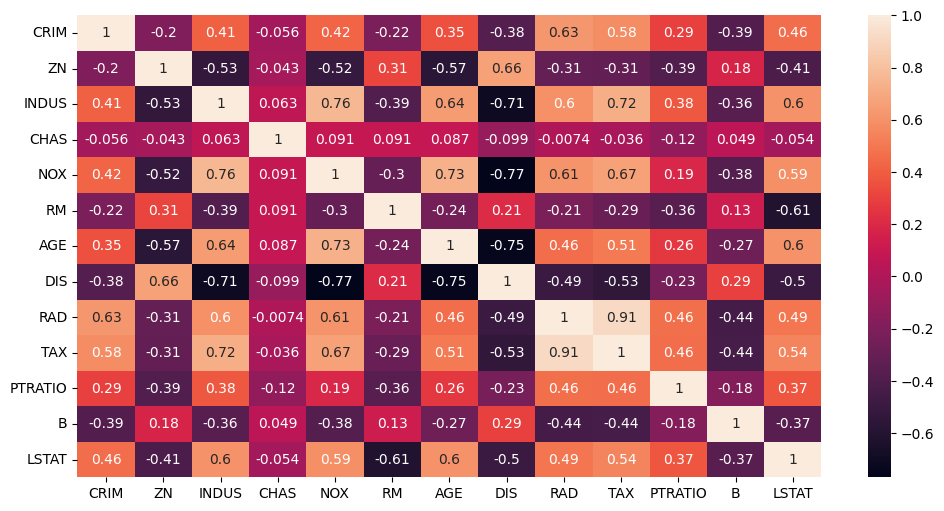

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)

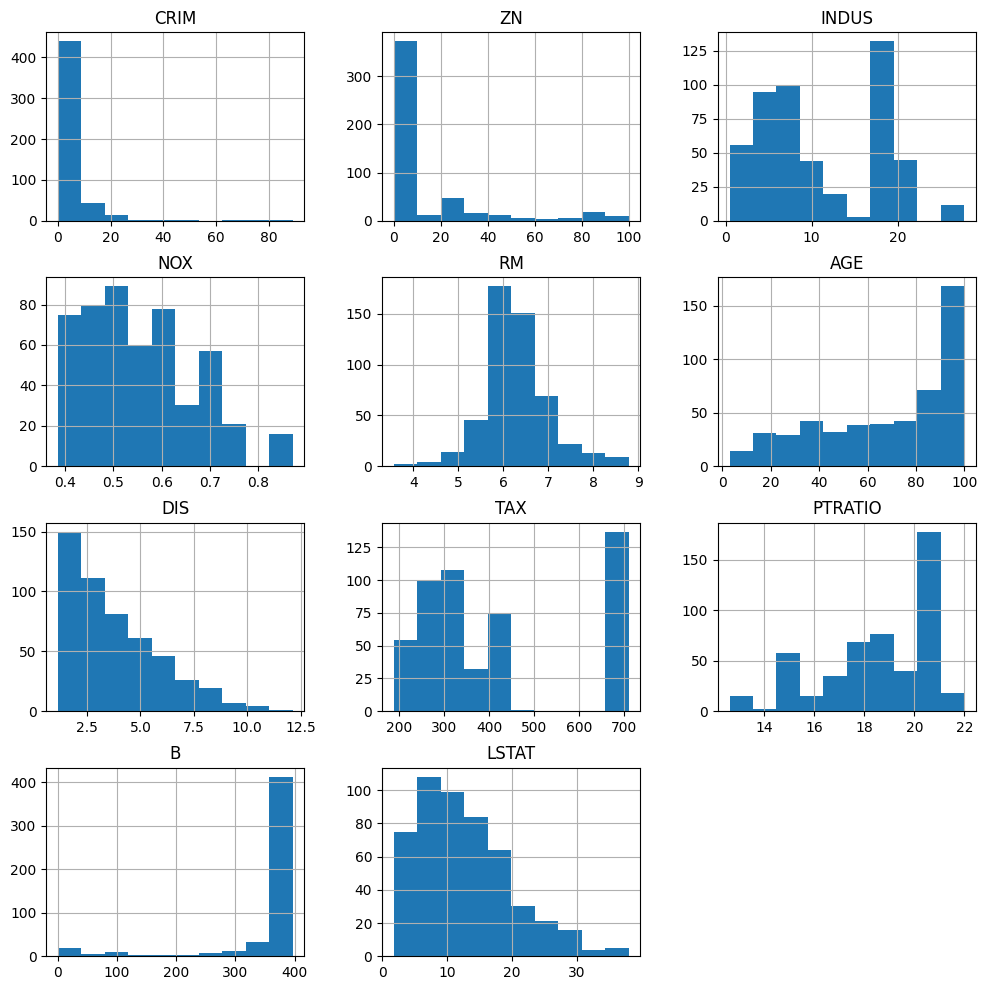

In [ ]:
df.hist(figsize=(12,12));

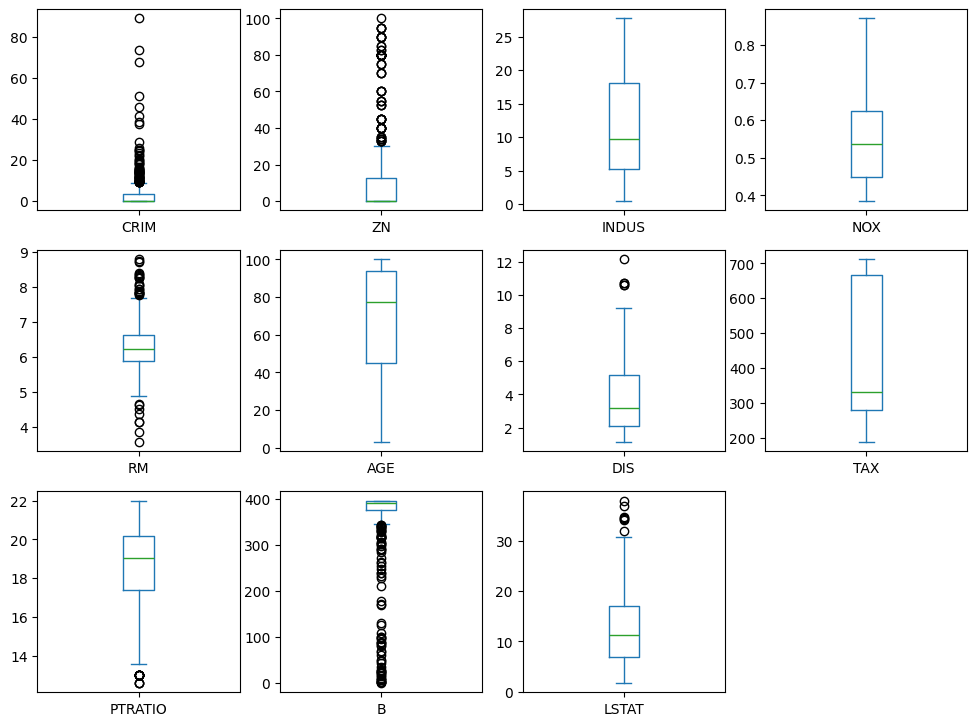

In [ ]:
df.plot(kind='box', subplots=True, layout=(4,4), figsize=(12,12))
plt.show()

<Axes: xlabel='PRICE', ylabel='Count'>

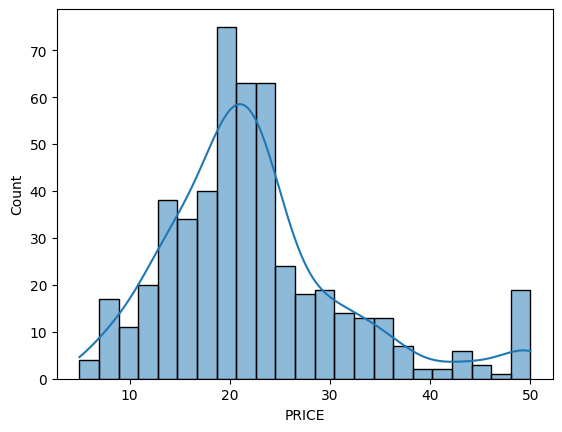

In [ ]:
sns.histplot(df['PRICE'], kde=True)

# conclusion
In this exploratory data analysis of the Boston Housing dataset, we investigated the various factors that influence home prices in the Boston area. Through statistical summaries, visualizations, and dimensionality reduction techniques, several key insights emerged:

Strong Predictors of Price:
Features such as the average number of rooms per dwelling (RM) and the percentage of lower status population (LSTAT) showed the strongest correlations with housing prices. Specifically, more rooms generally correspond to higher prices, while a higher proportion of lower status residents tends to decrease prices.

Feature Relationships:
Other variables like pupil-teacher ratio (PTRATIO), nitric oxides concentration (NOX), and proportion of non-retail business acres (INDUS) also demonstrated meaningful relationships with price, often negatively correlated.

Dimensionality Reduction:
Applying Principal Component Analysis (PCA) on the top selected features helped visualize the data structure and confirmed that a few components capture most of the variance related to price.

Data Distribution and Variability:
The target variable (house price) showed a roughly normal distribution with some skewness, and categorical variables such as proximity to the Charles River (CHAS) influenced price distributions.

Overall, this analysis highlights the multifaceted nature of housing prices and identifies the most influential features for further modeling or policy considerations. The insights gained provide a solid foundation for building predictive models or conducting deeper socioeconomic studies related to housing markets.

